In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [4]:
X_st = X.copy().astype(np.float64)
X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

# 1
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [5]:
lambda_w = {}
lambdas = [0.00001, 0.0005, 0.001, 0.005, 0.01, 0.2]
for lam in lambdas:
    W = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-3, lambda_=lam)
    lambda_w[lam]= W
    print()

1000 [49.71404242  3.66443213  3.48148744  4.46133044] 100.16308385908684
2000 [56.36142414  4.16647719  3.16712634  4.31389387] 41.5598864043621
3000 [57.25923159  4.55420386  2.89087355  4.20534395] 40.25728787246912
4000 [57.38049109  4.86191091  2.65759976  4.13334251] 40.08280514047517
5000 [57.39686862  5.10678078  2.46087873  4.08730662] 39.98121982328562
6000 [57.3990806   5.30215189  2.29515172  4.05948936] 39.91452406989277
7000 [57.39937935  5.45843071  2.15566154  4.04427331] 39.87023116875911
8000 [57.3994197   5.58375557  2.03834876  4.03760998] 39.840599357541876
9000 [57.39942515  5.68450647  1.93975791  4.03660304] 39.82064814388049
10000 [57.39942589  5.76569745  1.85695393  4.03919918] 39.80713925210206

1000 [49.69726691  3.66416671  3.48101952  4.46004433] 100.42139645723978
2000 [56.33586084  4.16601515  3.16713255  4.31227884] 41.61373135858797
3000 [57.23160137  4.55320126  2.89155701  4.20358334] 40.266212858900815
4000 [57.35246298  4.86016497  2.65907833  4.1

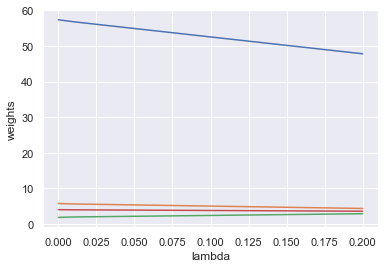

In [6]:
x_plot = list(lambda_w.keys())
y_plot = list(lambda_w.values())
plt.plot(x_plot, y_plot)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

# 2
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

**Одновременно иметь минимум в 0(нормализация) и среднее в 0 (стандартизация) - невозможно**  
Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1.  
Стандартизация подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.

# 3
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [7]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        # |W|' = sign(W)
        W -= alpha * (2/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [8]:
lambda_w_l1 = {}
lambdas = [0.00001, 0.0005, 0.001, 0.005, 0.01, 0.2]
for lam in lambdas:
    lambda_w_l1[lam]= eval_model_reg1(X_st, y, iterations=10000, alpha=1e-3, lambda_=lam)
    print()

1000 [49.71438055  3.66443581  3.48149521  4.46135481] 100.15788359180098
2000 [56.36194115  4.16648483  3.1671245   4.31392492] 41.55881098632745
3000 [57.25979075  4.5542225   2.89085794  4.20537796] 40.257123074756926
4000 [57.38105838  4.86194471  2.65756794  4.13337775] 40.082769253639455
5000 [57.39743733  5.10683176  2.46082938  4.08734243] 39.98119784236716
6000 [57.39964955  5.30222065  2.29508434  4.05952562] 39.91450188035509
7000 [57.39994834  5.45851696  2.15557625  4.04431023] 39.870208226290735
8000 [57.3999887   5.58385845  2.03824608  4.03764786] 39.8405765816812
9000 [57.39999415  5.68462482  1.93963865  4.03664221] 39.82062632236199
10000 [57.39999489  5.76582996  1.85681912  4.03923994] 39.80711889384586

1000 [49.71416864  3.66435082  3.48140814  4.46126245] 100.1611629244214
2000 [56.36170062  4.16639751  3.16704083  4.31383038] 41.559311938442264
3000 [57.25954636  4.5541335   2.89077739  4.20528192] 40.25719362596991
4000 [57.38081346  4.8618543   2.65749     4.

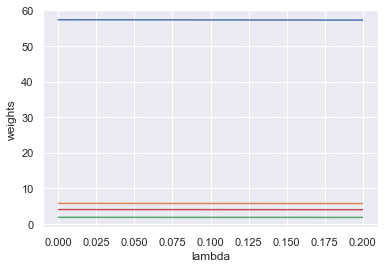

In [9]:
x_plot = list(lambda_w_l1.keys())
y_plot = list(lambda_w_l1.values())
plt.plot(x_plot, y_plot)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()